<a href="https://colab.research.google.com/github/SindhuraShankeshi/colab/blob/main/Overfitting%26Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
# Randomly choose 1000 samples, and split them into training and testing sets
X, y = make_moons(n_samples = 1000, noise=0.25, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 999, random_state=42)

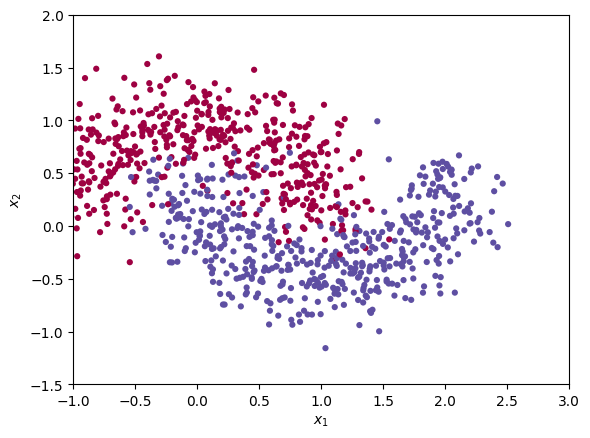

In [2]:
import matplotlib.pyplot as plt
def make_plot(X, y, plot_name, file_name, XX=None, YY=None,preds=None):
    plt.figure()
  # sns.set_style("whitegrid")
    axes = plt.gca()
    axes.set_xlim([-1,3])
    axes.set_ylim([-1.5,2])
    axes.set(xlabel="$x_1$", ylabel="$x_2$")
# Plot prediction surface
    if(XX is not None and YY is not None and preds is not None):
      plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 0.08, cmap=cm.Spectral)
      plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    # Plot samples
    markers = ['o' if i == 1 else 's' for i in y.ravel()] 
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=20, cmap=plt.cm.Spectral, edgecolors='none')
make_plot(X, y, None, "dataset.svg")

In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dense


for n in range(5): # Create 5 different network withdifferent layers
  model = Sequential()
  # Create 1st layer
  model.add(Dense(8, input_dim=2,activation='relu'))
  for _ in range(n): # Add nth layer
    model.add(Dense(32, activation='relu'))
  model.add(Dense(1, activation='sigmoid')) # Add last layer

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 0.6954 - accuracy: 0.0000e+00
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6851 - accuracy: 1.0000
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6740 - accuracy: 1.0000
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6630 - accuracy: 1.0000
Epoch 5/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6534 - accuracy: 1.0000
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 0.6441 - accuracy: 1.0000
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6348 - accuracy: 1.0000
Epoch 8/500
1/1 [==============================] - 0s 11ms/step - loss: 0.6262 - accuracy: 1.0000
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 0.6175 - accuracy: 1.0000
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 0.6087 - accuracy: 1.0000
Epoch 11/500
1/1 [

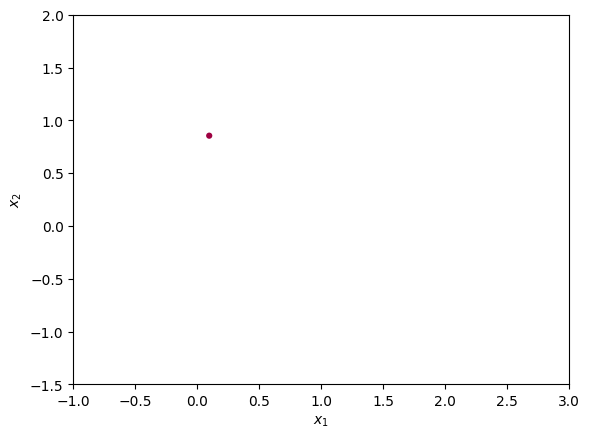

In [4]:
import numpy as np
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy']) # Configure and train
history = model.fit(X_train, y_train, epochs=500, verbose=1)
# Plot boundaries for different network
# preds = model.predict_classes(np.c_[XX.ravel(),YY.ravel()])
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
title = "Network layer ({})".format(n)
file = "NetworkCapacity%f.png"%(2+n*1)
make_plot(X_train, y_train, title, file, classes_x, predict_x)